# TITANIC: Kaggle competition

**TAREA: CLASIFICACIÓN**<br>
**NIVEL: INTERMEDIATE**

Vamos a participar en la competicion de **Kaggle del Titanic**: https://www.kaggle.com/competitions/titanic <br> Para ello atacaremos 3 puntos clave para obtener el mejor modelo posible:
* ML Preprocessing
* Competicion de modelos
* Hiperparametros
<br><br>
A diferencia de en el flujo ML convencional, en las competiciones de Kaggle no haremos la evaluación del TEST en el notebook, sino que tendremos que subir un predict del test a la plataforma de submissions y la plataforma lo evaluará.
<br><br>
...A POR ELLO!

# Libraries

In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.set_option('display.max_columns',100)   # para visualizar mas columnas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv', index_col=0)

In [ ]:
print(df.shape)

(891, 11)


In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ML Preprocessing

## EDA

Analisis de las distribuciones de las variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
df.describe(include='all').T


NameError: ignored

In [ ]:
target = ["Survived"]
def obtener_lista_variables(dataset):
  lista_numericas=[]
  lista_boolean=[]
  lista_categoricas=[]
  for i in dataset:
    if ( (dataset[i].dtype.kind=="f") | (dataset[i].dtype.kind=="i"))  & (i not in target) & (len(dataset[i].unique())!=2):
      lista_numericas.append(i)
    elif ( (dataset[i].dtype.kind=="b") | (dataset[i].dtype.kind=="i"))  & (i not in target) & (len(dataset[i].unique())==2):
      lista_boolean.append(i)
    elif (dataset[i].dtype.kind=="O") & (i not in target):
      lista_categoricas.append(i)

  return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
lista_numericas, lista_boolean, lista_categoricas=obtener_lista_variables(df)

In [ ]:
lista_numericas

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
lista_boolean

[]

In [ ]:
lista_categoricas

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [ ]:
df["Age"].value_counts()


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
df["Cabin"].value_counts()


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

[[<AxesSubplot:title={'center':'Pclass'}>]]
[[<AxesSubplot:title={'center':'Age'}>]]
[[<AxesSubplot:title={'center':'SibSp'}>]]
[[<AxesSubplot:title={'center':'Parch'}>]]
[[<AxesSubplot:title={'center':'Fare'}>]]


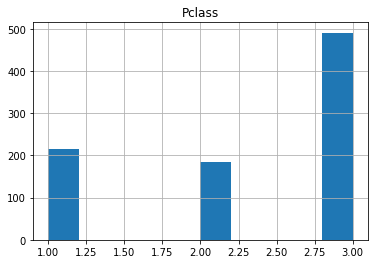

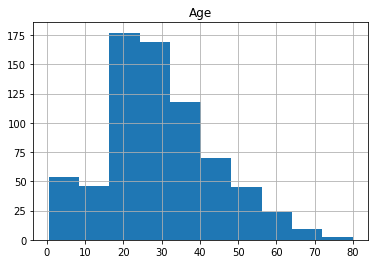

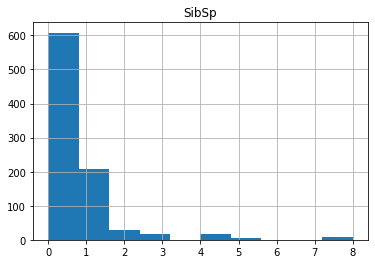

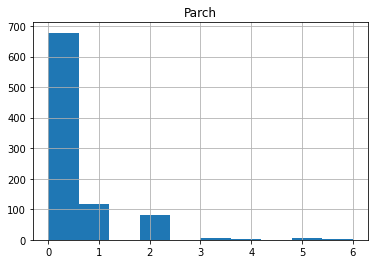

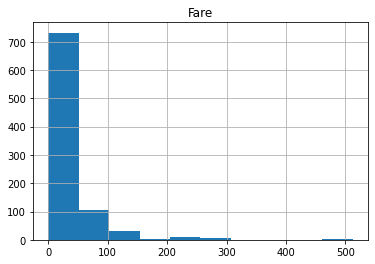

In [ ]:
for i in lista_numericas:
  print(df.hist(i))

In [ ]:
df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
len(df[df.duplicated("PassengerId")])

KeyError: ignored

## Data cleaning

El step del data cleaning es el cajón de sastre donde corregiremos las particularidades del dataset más allá del ML preprocessing estandar. Por ejemplo:
* Eliminar filas duplicadas
* Eliminar filas sin target informado
* Eliminar columnas irrelevantes
* Corregir erratas en literales
* Corregir data types

In [ ]:
del(df["Name"])
del(df["Ticket"])

In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S


<AxesSubplot:xlabel='Pclass'>

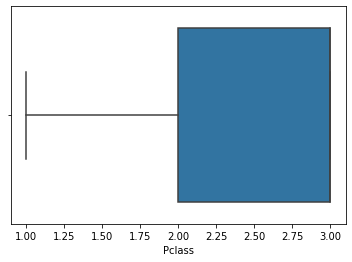

In [ ]:
sns.boxplot(x="Pclass",data=df)

<AxesSubplot:xlabel='Age'>

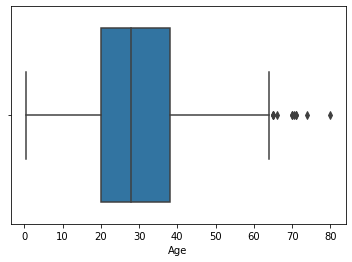

In [ ]:
sns.boxplot(x="Age",data=df)

<AxesSubplot:xlabel='Fare'>

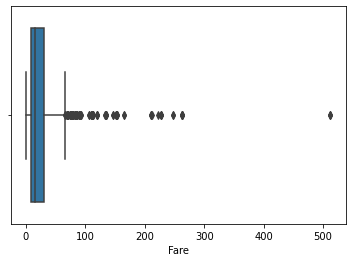

In [ ]:
sns.boxplot(x="Fare",data=df)

In [ ]:
df.drop(df[df["Fare"]>200].index,inplace=True)

<AxesSubplot:xlabel='Fare'>

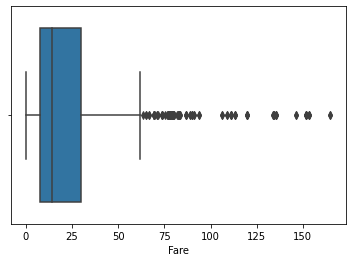

In [ ]:
sns.boxplot(x="Fare",data=df)

In [ ]:
df.drop(df[df["SibSp"]>7].index,inplace=True)

## Imputar valores en nulos

Algunas de las estrategias mas comunes:
* Imputar valor outlier (-999, 'Unknown')
* Imputar media en numericos
* Imputar moda en categoricos
* Imputar 0

In [ ]:
del(df["Cabin"])

In [ ]:
df['Embarked']= np.where(df['Embarked'].isna(),df["Embarked"].mode(),df['Embarked'])

In [ ]:
df["Embarked"].mode()

0    S
dtype: object

In [ ]:
Age_mean = df["Age"].mean()

In [ ]:
df['Age']= np.where(df['Age'].isna(),df["Age"].mean(),df['Age'])

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Encoding categoricos

3 opciones:
* Si tienen un sentido ordinal -> convertir a numerico.
* Si tienen un sentido cardinal:
  * 2 posibles categorias -> indicador booleano
  * más de 2 categorias -> One-Hot-Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [ ]:
le = LabelEncoder()

In [ ]:
df1=df.copy()

In [ ]:
df1=pd.get_dummies(data=df1,columns = lista_categoricas)

KeyError: ignored

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  864 non-null    int64  
 1   Pclass    864 non-null    int64  
 2   Sex       864 non-null    object 
 3   Age       864 non-null    float64
 4   SibSp     864 non-null    int64  
 5   Parch     864 non-null    int64  
 6   Fare      864 non-null    float64
 7   Embarked  864 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 60.8+ KB


In [ ]:
minMaxScaler = MinMaxScaler()

In [ ]:
df2=df1.copy()

In [ ]:
lista_numericas

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
df2["Pclass"]=minMaxScaler.fit_transform(df2["Pclass"].values.reshape(-1,1))

In [ ]:
df2["Age"]=minMaxScaler.fit_transform(df2["Age"].values.reshape(-1,1))

In [ ]:
df2["SibSp"]=minMaxScaler.fit_transform(df2["SibSp"].values.reshape(-1,1))

In [ ]:
df2["Parch"]=minMaxScaler.fit_transform(df2["Parch"].values.reshape(-1,1))

In [ ]:
df2["Fare"]=minMaxScaler.fit_transform(df2["Fare"].values.reshape(-1,1))

In [ ]:
df2.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,1.0,male,0.271174,0.2,0.0,0.043975,S
2,1,0.0,female,0.472229,0.2,0.0,0.432369,C
3,1,1.0,female,0.321438,0.0,0.0,0.048069,S


In [ ]:
corr = df2.corr()
corr.style.background_gradient(cmap="coolwarm")

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.325867,-0.071865,0.002854,0.095286,0.311387
Pclass,-0.325867,1.000000,-0.341694,0.063335,0.038442,-0.670434
Age,-0.071865,-0.341694,1.000000,-0.290475,-0.195523,0.128977
SibSp,0.002854,0.063335,-0.290475,1.000000,0.380526,0.210850
Parch,0.095286,0.038442,-0.195523,0.380526,1.000000,0.211408
Fare,0.311387,-0.670434,0.128977,0.210850,0.211408,1.000000


In [ ]:
df = pd.DataFrame(data = df2)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))

Top Absolute Correlations


KeyError: ignored

## Eliminar variables altamente correlacionadas

In [ ]:
# Funcion que mide las variables a eliminar por alta correlacion
# Inputs:
#   * X-y
#   * threshold: valor umbral por encima del cual consideramos que la correlacion es intolerable (normalmente 90-95%)

def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

In [ ]:
del(df2["Sex_male"])

KeyError: ignored

In [ ]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,1.0,male,0.271174,0.2,0.0,0.043975,S
2,1,0.0,female,0.472229,0.2,0.0,0.432369,C
3,1,1.0,female,0.321438,0.0,0.0,0.048069,S
4,1,0.0,female,0.434531,0.2,0.0,0.322078,S
5,0,1.0,male,0.434531,0.0,0.0,0.048827,S


## Eliminar variables de nula varianza

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
target = 'Survived'
features = df2.columns[df.columns != target]

In [ ]:
y = df[target]
X = df[features]

In [ ]:
vt = VarianceThreshold(threshold = 0.01) #Eliminamos columnas donde el 99% de los valores son iguales
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

ValueError: ignored

# Split X-y

In [ ]:
target = 'Survived'
features = df.columns[df.columns != target]

In [ ]:
y = df[target]
X = df[features]

In [ ]:
print('Target del modelo:', target)
print('Variables a utilizar en el modelo:', list(features))

Target del modelo: Survived
Variables a utilizar en el modelo: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


# Target distribution

[]

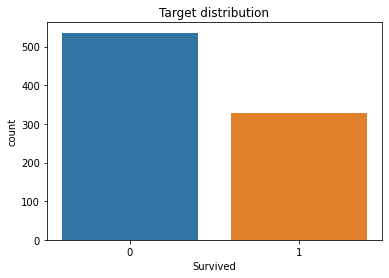

In [ ]:
sns.countplot(df[target])
plt.title('Target distribution')
plt.plot()

# Split train-test (NO)

Como estamos en una competicion no sacrificaremos parte del dataset para TEST, haremos Cross-Validation para seleccionar el mejor modelo.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train = X
y_train = y

# Rescaling

Definimos el scaler en el train (.fit_transform).

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Estandarización: fit_transform() en train, transform() en test
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

ValueError: ignored

# TRAIN MODEL

## Model competition

* Prueba distintos modelos de https://scikit-learn.org/stable/modules/classes.html
y mide su performance con Cross Validation.
* Para ello utiliza la funcion evaluate_classification() para registrar los resultados del benchmark de modelos.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
# Funcion que calcula el AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])

# Funcion que calcula el AUC en Cross-Validation (X-y). Args: modelo a validar, X, y
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model,
                              X, y,
                              cv=4,                 # Numero de folds que vamos a utilizar para validar
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )
  return cross_val.mean()

In [ ]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs:
#   * modelo
#   * (X,y)
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)

  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

Algunos modelos a probar:

In [ ]:
X_train.reset_index(drop=True, inplace=True)

In [ ]:
y_train.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
evaluate_classification(model = LogisticRegression(),
                    X=X_train, y=y_train)

In [ ]:
evaluate_classification(model = RandomForestClassifier(),
                    X=X_train, y=y_train)

In [ ]:
evaluate_classification(model = XGBClassifier(),
                    X=X_train, y=y_train)

In [ ]:
evaluate_classification(model = SVC(),
                    X=X_train, y=y_train)

## Hyperparameter tuning

La hiperparametrización puede ser costosa sino acotamos lo suficiente el abanico de posibles valores. Como consejo, centrarse en hiperparametrizar los primeros valores que aparecen dentro de la funcion del algoritmo, suelen ser los más determinantes, y no dejar de consultar la documentacion para entender que posibles valores adopta cada parametro.

In [ ]:
from sklearn import model_selection

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
parameters_hp = {
    "max_depth": [3, 6, 9],
    "learning_rate" : [0.01, 0.3, 0.5],
    "n_estimators" : [50, 100, 200],
    "min_child_weight" : [1, 2, 3]

}

In [ ]:
search = RandomizedSearchCV(estimator = XGBClassifier(),
                   param_distributions = parameters_hp,
                   n_iter = 20,
                   scoring = "roc_auc",
                   cv = 4
                   )

In [ ]:
search.fit(X_train, y_train)

In [ ]:
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", search.best_estimator_)
print("\n The best AUC:", search.best_score_)
print("\n The best parameters across ALL searched params:\n", search.best_params_)

## Final model

Como hemos aplicado hiperparametrizacion, el modelo sera el resultado del proceso (si conseguimos mejorar a la parametrización por default).



In [ ]:
best_model = search.best_estimator_

In [ ]:
print('AUC Train:', auc(best_model, X_train, y_train))
print('AUC CV:', auc_cross_validation(best_model, X_train, y_train))

AUC Train: 0.933737372588278
AUC CV: 0.8632257917728431


# PREDICT FOR SUBMISSION

Para hacer el submit de los datos en la competicion, tenemos que hacer un predict sobre el dataset 'titanic_test.csv'.

In [ ]:
X_pred = pd.read_csv('/content/drive/MyDrive/NUCLIO digital school/MODULO 3/Kaggle competition/test.csv')
X_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Model features

In [ ]:
X_pred.shape

(418, 11)

In [ ]:
features_model =  list(best_model.feature_names_in_)
print('Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:\n', features_model)

Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


## ML Preprocessing

Se deben acometer las mismas transformaciones que las realizadas en el preprocessing del train data:
* Generacion de nuevas variables
* Imputación de nulos (mismos valores)
* One Hot Encoding
* Drop de columnas
<br><br>
No repetimos:
* Analisis exploratorio
* Analisis de altas correlaciones
* Analisis de baja varianza

<br> (COPY+PASTE del proceso con un dataframe distinto)

In [ ]:
del(X_pred["Name"])
del(X_pred["Ticket"])

In [ ]:
del(X_pred["Cabin"])

In [ ]:
X_pred['Embarked']= np.where(X_pred['Embarked'].isna(),X_pred["Embarked"].mode(),X_pred['Embarked'])

In [ ]:
Age_mean = X_pred["Age"].mean()

In [ ]:
X_pred['Age']= np.where(X_pred['Age'].isna(),X_pred["Age"].mean(),X_pred['Age'])

In [ ]:
target = ["Survived"]
def obtener_lista_variables(dataset):
  lista_numericas=[]
  lista_boolean=[]
  lista_categoricas=[]
  for i in dataset:
    if ( (dataset[i].dtype.kind=="f") | (dataset[i].dtype.kind=="i"))  & (i not in target) & (len(dataset[i].unique())!=2):
      lista_numericas.append(i)
    elif ( (dataset[i].dtype.kind=="b") | (dataset[i].dtype.kind=="i"))  & (i not in target) & (len(dataset[i].unique())==2):
      lista_boolean.append(i)
    elif (dataset[i].dtype.kind=="O") & (i not in target):
      lista_categoricas.append(i)

  return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
lista_numericas, lista_boolean, lista_categoricas=obtener_lista_variables(X_pred)

In [ ]:
X_pred_1 =pd.get_dummies(data=X_pred,columns = lista_categoricas)

In [ ]:
X_pred_1["Pclass"]=minMaxScaler.fit_transform(X_pred_1["Pclass"].values.reshape(-1,1))

In [ ]:
X_pred_1["Age"]=minMaxScaler.fit_transform(X_pred_1["Age"].values.reshape(-1,1))

In [ ]:
X_pred_1["SibSp"]=minMaxScaler.fit_transform(X_pred_1["SibSp"].values.reshape(-1,1))

In [ ]:
X_pred_1["Parch"]=minMaxScaler.fit_transform(X_pred_1["Parch"].values.reshape(-1,1))

In [ ]:
X_pred_1["Fare"]=minMaxScaler.fit_transform(X_pred_1["Fare"].values.reshape(-1,1))

In [ ]:
del(X_pred_1["Sex_male"])

In [ ]:
X_pred_1.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
892,1.0,0.452723,0.000,0.0,0.015282,0,0,1,0
893,1.0,0.617566,0.125,0.0,0.013663,1,0,0,1
894,0.5,0.815377,0.000,0.0,0.018909,0,0,1,0


In [ ]:
X_pred_1.set_index("PassengerId", inplace=True)

In [ ]:
X.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.271174,0.2,0.0,0.043975,0,0,0,1
1,0.0,0.472229,0.2,0.0,0.432369,1,1,0,0


In [ ]:
X_pred_1.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
892,1.0,0.452723,0.000,0.0,0.015282,0,0,1,0
893,1.0,0.617566,0.125,0.0,0.013663,1,0,0,1
894,0.5,0.815377,0.000,0.0,0.018909,0,0,1,0


## Check model features

Check de variables. Las variables del dataset para PREDICT deben coincidir con las variables utilizadas en el entrenamiento.

In [ ]:
features_test = list(X_pred_1.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 9
Variables en modelos: 9
¿Match?: True


In [ ]:
missing_features = [i for i in features_model if i not in features_test]
print('Variables que faltan el el dataset:\n', missing_features)

Variables que faltan el el dataset:
 []


In [ ]:
for col in missing_features:
  X_pred[col]= 0

In [ ]:
drop_features = [i for i in features_test if i not in features_model]
print('Variables que debes eliminar de tu dataset:\n', drop_features)

Variables que debes eliminar de tu dataset:
 []


In [ ]:
X_pred.drop(columns = drop_features, inplace=True)

In [ ]:
features_test = list(X_pred_1.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 9
Variables en modelos: 9
¿Match?: True


In [ ]:
# Reordena variables
X_pred = X_pred[features_model]

## Rescaling

Aplicamos mismo scaler que en el training (".transform", no hacer ".fit")

In [ ]:
...

## Predictions

In [ ]:
predictions = best_model.predict(X_pred_1)
print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


# Upload predictions to Kaggle.com

Se deben subir las predicciones en un .csv con 2 columnas (PassengerId, Survived) en el apartado de submissions en https://www.kaggle.com/competitions/titanic/data. Debe contener 418 rows + header.

In [ ]:
submission = pd.DataFrame(predictions, columns=['Survived'], index = X_pred_1.index)

In [ ]:
X_pred_1.shape

(418, 9)

In [ ]:
submission

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
submission.to_csv('/content/drive/MyDrive/NUCLIO digital school/MODULO 3/Kaggle competition/predictions.csv')